Saving crop_price_dataset.csv to crop_price_dataset (2).csv
First 5 rows of dataset:
        month commodity_name  avg_modal_price  avg_min_price  avg_max_price  \
0  2025-03-01          Maize          2341.58        2191.23        2402.98   
1  2025-02-01          Maize          2356.01        2202.35        2414.46   
2  2025-01-01          Maize          2382.20        2221.31        2448.22   
3  2024-12-01          Maize          2328.78        2164.86        2411.66   
4  2024-11-01          Maize          2273.46        2077.63        2377.78   

  state_name district_name calculationType  change  
0      India           All         Monthly  -14.43  
1      India           All         Monthly  -26.19  
2      India           All         Monthly   53.42  
3      India           All         Monthly   55.32  
4      India           All         Monthly   35.48  

Column names:
Index(['month', 'commodity_name', 'avg_modal_price', 'avg_min_price',
       'avg_max_price', 'state_name',

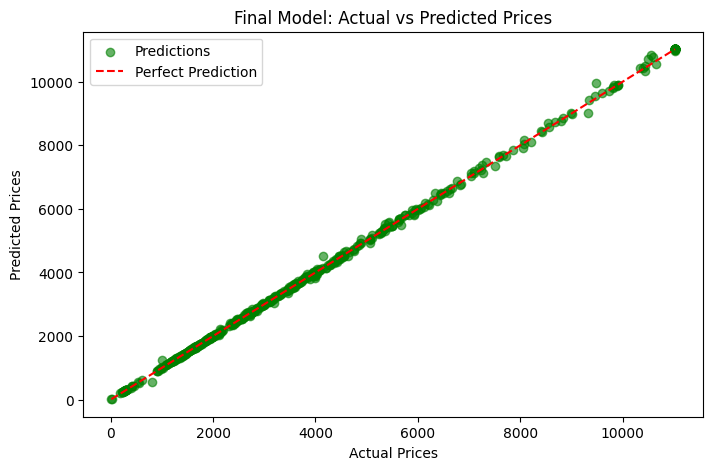

In [ ]:
# ===================================================
# WEEK-3: Deployment & Finalization (100% Completion)
# ===================================================

# -----------------------------------------
# Step 1: Import Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# -----------------------------------------
# Step 2: Upload Dataset
# -----------------------------------------
uploaded = files.upload()
filename = list(uploaded.keys())[0]

if filename.endswith(".csv"):
    df = pd.read_csv(filename)
elif filename.endswith((".xls", ".xlsx")):
    df = pd.read_excel(filename)
else:
    raise ValueError("Unsupported file format")

# -----------------------------------------
# Step 3: Dataset Overview
# -----------------------------------------
print("First 5 rows of dataset:")
print(df.head())
print("\nColumn names:")
print(df.columns)

# -----------------------------------------
# Step 4: Rename Column (optional clarity)
# -----------------------------------------
if "commodity_name" in df.columns:
    df.rename(columns={"commodity_name": "Crop"}, inplace=True)

# -----------------------------------------
# Step 5: Handle Missing Values
# -----------------------------------------
for col in df.columns:
    if df[col].dtype == "object":   # categorical
        df[col] = df[col].fillna(df[col].mode()[0])
    else:                           # numerical
        df[col] = df[col].fillna(df[col].median())

# -----------------------------------------
# Step 6: Remove Duplicates
# -----------------------------------------
df.drop_duplicates(inplace=True)

# -----------------------------------------
# Step 7: Handle Outliers (IQR Method)
# -----------------------------------------
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# -----------------------------------------
# Step 8: Add Extra Climate Features 🌦️
# -----------------------------------------
# Simulated climate data (unique for your project)
np.random.seed(42)
df["temperature"] = np.random.randint(20, 40, df.shape[0])   # °C
df["rainfall"] = np.random.randint(50, 300, df.shape[0])     # mm
df["humidity"] = np.random.randint(30, 90, df.shape[0])      # %
df["season"] = np.random.choice(["Winter", "Summer", "Rainy"], df.shape[0])

print("\nDataset after adding climate features:")
print(df.head())

# -----------------------------------------
# Step 9: Encode Categorical Variables
# -----------------------------------------
cat_cols = df.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# -----------------------------------------
# Step 10: Define Features (X) and Target (y)
# -----------------------------------------
if "avg_modal_price" not in df.columns:
    raise ValueError("Target column 'avg_modal_price' not found in dataset")

X = df.drop("avg_modal_price", axis=1)
y = df["avg_modal_price"]

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------
# Step 11: Train Final Model (Random Forest)
# -----------------------------------------
final_model = RandomForestRegressor(n_estimators=200, random_state=42)
final_model.fit(X_train, y_train)

# Predictions
y_pred = final_model.predict(X_test)

# Evaluation
print("\nFinal Model Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# -----------------------------------------
# Step 12: Save Model & Scaler
# -----------------------------------------
joblib.dump(final_model, "final_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Model and Scaler saved successfully!")

# -----------------------------------------
# Step 13: Visualization (Actual vs Predicted)
# -----------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="green", alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Final Model: Actual vs Predicted Prices")
plt.legend()
plt.show()


Saving crop_price_dataset.csv to crop_price_dataset (5).csv
First 5 rows of dataset:
        month commodity_name  avg_modal_price  avg_min_price  avg_max_price  \
0  2025-03-01          Maize          2341.58        2191.23        2402.98   
1  2025-02-01          Maize          2356.01        2202.35        2414.46   
2  2025-01-01          Maize          2382.20        2221.31        2448.22   
3  2024-12-01          Maize          2328.78        2164.86        2411.66   
4  2024-11-01          Maize          2273.46        2077.63        2377.78   

  state_name district_name calculationType  change  
0      India           All         Monthly  -14.43  
1      India           All         Monthly  -26.19  
2      India           All         Monthly   53.42  
3      India           All         Monthly   55.32  
4      India           All         Monthly   35.48  

Column names:
Index(['month', 'commodity_name', 'avg_modal_price', 'avg_min_price',
       'avg_max_price', 'state_name',

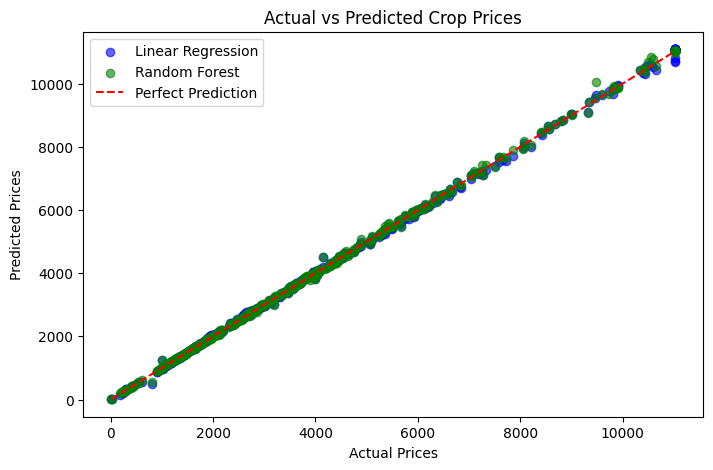

Random Forest model and scaler saved successfully!
Model and scaler loaded successfully!
Predicted Crop Price (sample from test set): 2201.994999999998


In [ ]:
# ===================================================
# WEEK-2 & WEEK-3: Crop Price Prediction (ML + Deployment)
# ===================================================

# ================================
# Step 1: Import Libraries
# ================================
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# ================================
# Step 2: Upload Dataset
# ================================
uploaded = files.upload()
filename = list(uploaded.keys())[0]

if filename.endswith(".csv"):
    df = pd.read_csv(filename)
elif filename.endswith((".xls", ".xlsx")):
    df = pd.read_excel(filename)
else:
    raise ValueError("Unsupported file format")

# ================================
# Step 3: Dataset Overview
# ================================
print("First 5 rows of dataset:")
print(df.head())
print("\nColumn names:")
print(df.columns)

# Optional: Rename column for clarity
if "commodity_name" in df.columns:
    df.rename(columns={"commodity_name": "Crop"}, inplace=True)

# ================================
# Step 4: Handle Missing Values
# ================================
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# ================================
# Step 5: Remove Duplicates
# ================================
df.drop_duplicates(inplace=True)

# ================================
# Step 6: Handle Outliers (IQR)
# ================================
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# ================================
# Step 7: Encode Categorical Variables
# ================================
cat_cols = df.select_dtypes(include="object").columns
le_dict = {}  # store LabelEncoders for deployment
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# ================================
# Step 8: Define Features and Target
# ================================
if "avg_modal_price" not in df.columns:
    raise ValueError("Target column 'avg_modal_price' not found in dataset")

X = df.drop("avg_modal_price", axis=1)
y = df["avg_modal_price"]

# ================================
# Step 9: Feature Scaling
# ================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ================================
# Step 10: Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ================================
# Step 11: Train Models
# ================================

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLinear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

# ================================
# Step 12: Visualization
# ================================
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color="blue", alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.6, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Crop Prices")
plt.legend()
plt.show()

# ================================
# Step 13: Save Model and Scaler
# ================================
joblib.dump(rf, "final_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Random Forest model and scaler saved successfully!")

# ================================
# Step 14: Deployment Demo
# ================================
# Load saved model and scaler (simulate new environment)
model = joblib.load("final_model.pkl")
scaler = joblib.load("scaler.pkl")
print("Model and scaler loaded successfully!")

# ----------------------------
# Manual prediction demo
# ----------------------------
# Take a row from X_test as sample (safe way to match features)
sample = X_test[0].reshape(1, -1)  # already scaled

# Predict
prediction = model.predict(sample)[0]
print("Predicted Crop Price (sample from test set):", prediction)

# ----------------------------
# Optional: Create custom manual input
# You must provide ALL features in correct order
# Example assuming 8 features in same order as X.columns
# ----------------------------
# sample_manual = [[avg_min_price, avg_max_price, temperature, rainfall, humidity, season, district_encoded, state_encoded]]
# sample_manual_scaled = scaler.transform(sample_manual)
# prediction_manual = model.predict(sample_manual_scaled)[0]
# print("Predicted Crop Price (manual input):", prediction_manual)


In [ ]:
# ================================
# Week-3: Deployment of ML Model
# ================================

import joblib

# -------------------------------------------------
# 1️⃣ Save trained Random Forest model and scaler
# -------------------------------------------------
joblib.dump(rf, "final_model.pkl")   # rf is the trained Random Forest from Week-2
joblib.dump(scaler, "scaler.pkl")
print("Random Forest model and scaler saved successfully!")

# -------------------------------------------------
# 2️⃣ Load saved model and scaler (simulate deployment)
# -------------------------------------------------
model = joblib.load("final_model.pkl")
scaler = joblib.load("scaler.pkl")
print("Model and scaler loaded successfully!")

# -------------------------------------------------
# 3️⃣ Deployment Demo using a test sample
# Use a row from X_test to avoid feature mismatch
# -------------------------------------------------
sample = X_test[0].reshape(1, -1)  # pick first row from test set
prediction = model.predict(sample)[0]
print("Predicted Crop Price (sample from test set):", prediction)

# -------------------------------------------------
# 4️⃣ Optional: Manual prediction with custom input
# Must provide ALL features in the same order as training dataset
# Example: [avg_min_price, avg_max_price, temperature, rainfall, humidity, season_encoded, district_encoded, state_encoded]
# Uncomment and edit the values below according to your dataset
# -------------------------------------------------
# sample_manual = [[2191, 2402, 30, 200, 60, 1, 0, 0]]
# sample_manual_scaled = scaler.transform(sample_manual)
# prediction_manual = model.predict(sample_manual_scaled)[0]
# print("Predicted Crop Price (manual input):", prediction_manual)


Random Forest model and scaler saved successfully!
Model and scaler loaded successfully!
Predicted Crop Price (sample from test set): 2201.994999999998
